In [4]:
# import packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.ndimage.filters import uniform_filter

# import data
# input data files are available in the "../input/" directory.
train_data = pd.read_json('train.json/data/processed/train.json')

C:\Users\dell\AppData\Local\Temp\ipykernel_11872\4285245201.py:5: DeprecationWarning: Please use `uniform_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import uniform_filter


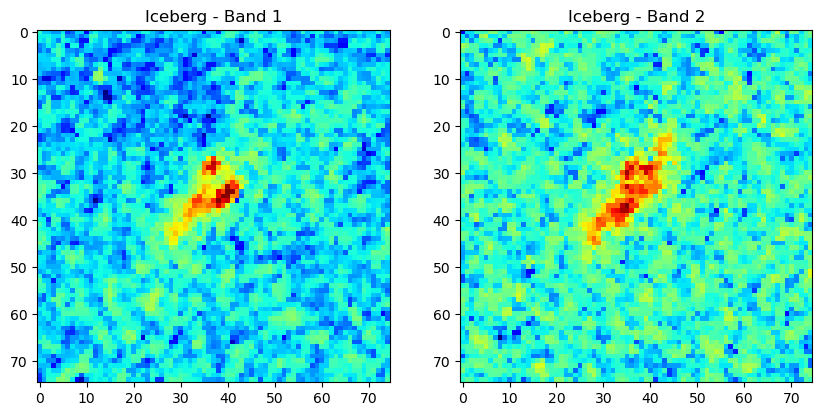

In [5]:
row = train_data.sample(1)
title_str = 'Iceberg' if row['is_iceberg'].values == 1 else 'Ship'

band_1= np.reshape(row['band_1'].values.tolist(),(75,75))
band_2= np.reshape(row['band_2'].values.tolist(),(75,75))

fig = plt.figure(0, figsize=(10,10))
ax = fig.add_subplot(1,2,1)
ax.set_title(title_str + ' - Band 1')
ax.imshow(band_1,cmap='jet')
ax = fig.add_subplot(1,2,2)
ax.set_title(title_str + ' - Band 2')
ax.imshow(band_2,cmap='jet')
plt.show()

In [6]:
# implement functions to convert SAR data from decibel units to linear units and back again
def decibel_to_linear(band):
     # convert to linear units
    return np.power(10,np.array(band)/10)

def linear_to_decibel(band):
    return 10*np.log10(band)

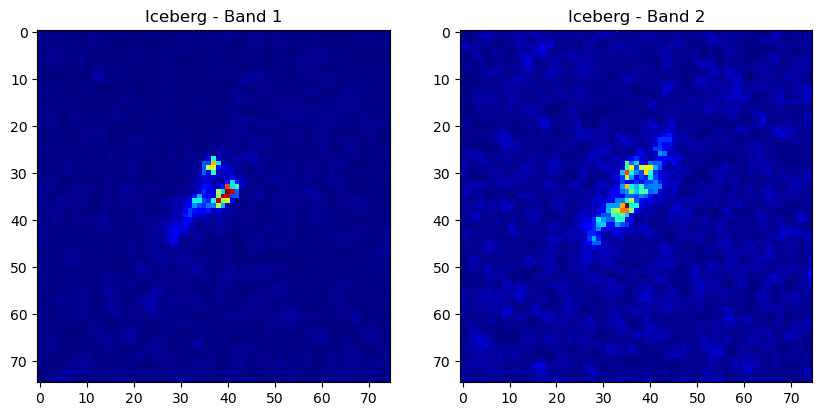

In [7]:
band_1_linear = decibel_to_linear(band_1)
band_2_linear = decibel_to_linear(band_2)

fig = plt.figure(1, figsize=(10,10))
ax = fig.add_subplot(1,2,1)
ax.set_title(title_str + ' - Band 1')
ax.imshow(band_1_linear,cmap='jet')
ax = fig.add_subplot(1,2,2)
ax.set_title(title_str + ' - Band 2')
ax.imshow(band_2_linear,cmap='jet')
plt.show()

In [8]:
def lee_filter(band, window, var_noise = 0.25):
        # band: SAR data to be despeckled (already reshaped into image dimensions)
        # window: descpeckling filter window (tuple)
        # default noise variance = 0.25
        # assumes noise mean = 0
    
        mean_window = uniform_filter(band, window)
        mean_sqr_window = uniform_filter(band**2, window)
        var_window = mean_sqr_window - mean_window**2

        weights = var_window / (var_window + var_noise)
        band_filtered = mean_window + weights*(band - mean_window)
        return band_filtered

In [9]:
windows = [2, 4, 8] # can be tuple too if not symetric
noise_var = np.array([1, 2, 4])

title_str_1 = title_str + ' Band 1\nWindow: {}, Noise Var: {}'
title_str_2 = title_str + ' Band 2\nWindow: {}, Noise Var: {}'

noise_var_1 = np.round(np.var(band_1_linear)*noise_var,10)
noise_var_2 = np.round(np.var(band_2_linear)*noise_var,10)

<Figure size 1500x1500 with 0 Axes>

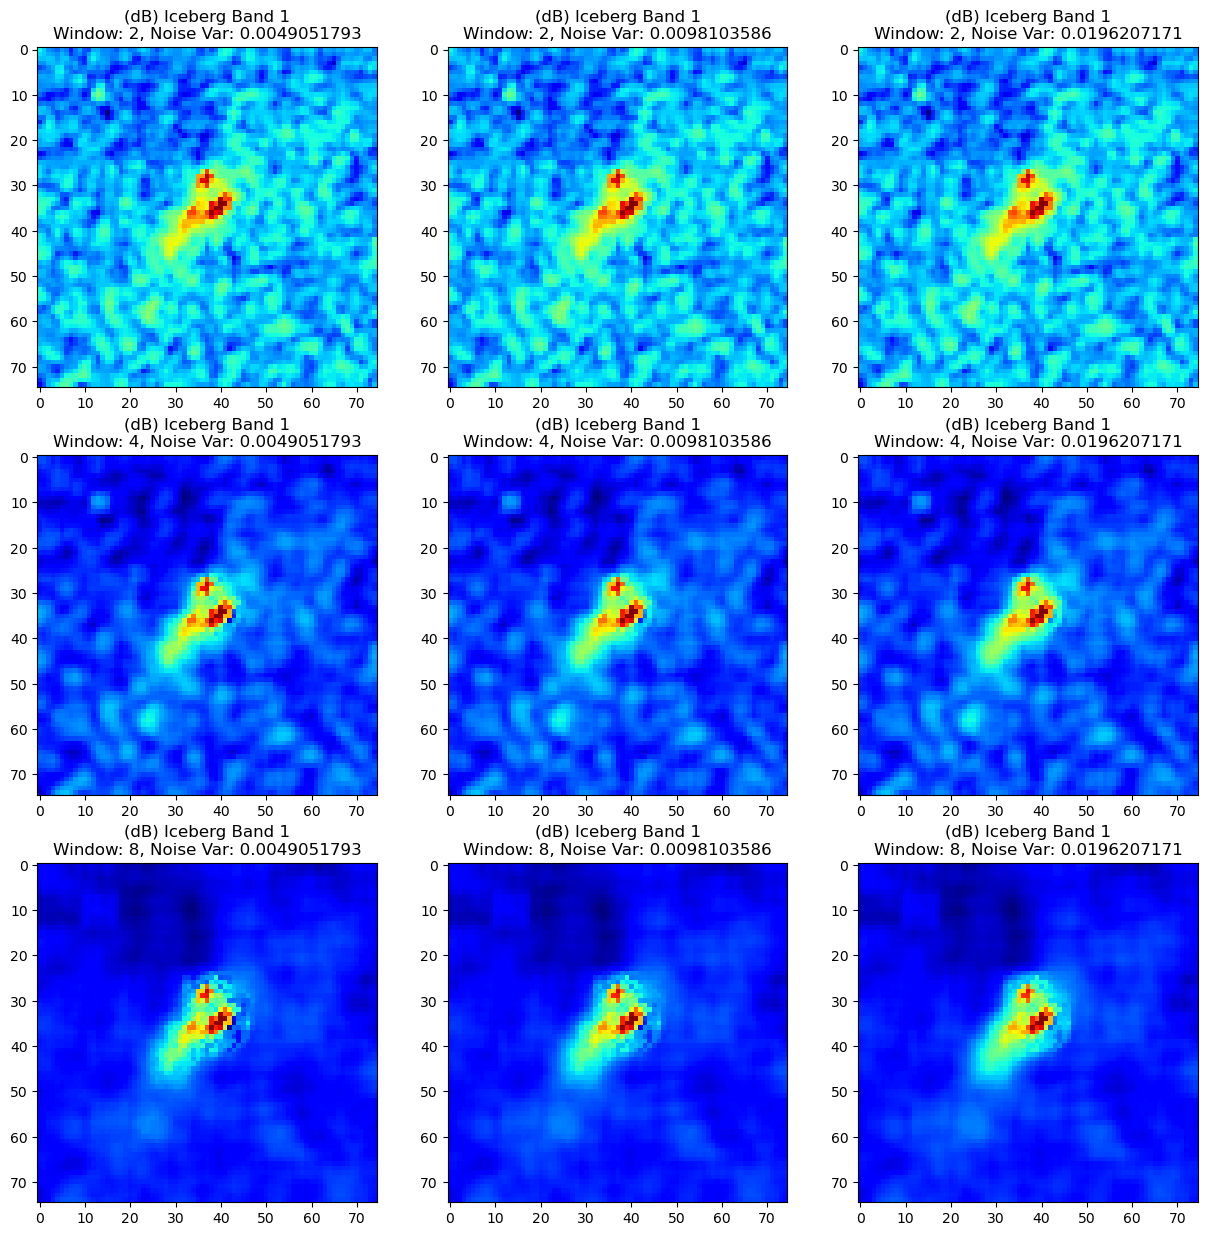

In [10]:
ig = plt.figure(2,figsize=(15,15))
p = 0
for i in range(3):
    for j in range(3):
        p+=1
        ax = fig.add_subplot(3,3,p)
        title = title_str_1.format(str(windows[i]), str(noise_var_1[j]))
        ax.set_title(title)
        ax.imshow(lee_filter(band_1_linear, windows[i], noise_var_1[j]),cmap='jet')    
plt.show()

fig = plt.figure(3,figsize=(15,15))
p = 0
for i in range(3):
    for j in range(3):
        p+=1
        ax = fig.add_subplot(3,3,p)
        title = title_str_1.format(str(windows[i]), str(noise_var_1[j]))
        ax.set_title('(dB) ' + title)
        ax.imshow(linear_to_decibel(lee_filter(band_1_linear, windows[i], noise_var_1[j])),cmap='jet')    
plt.show()

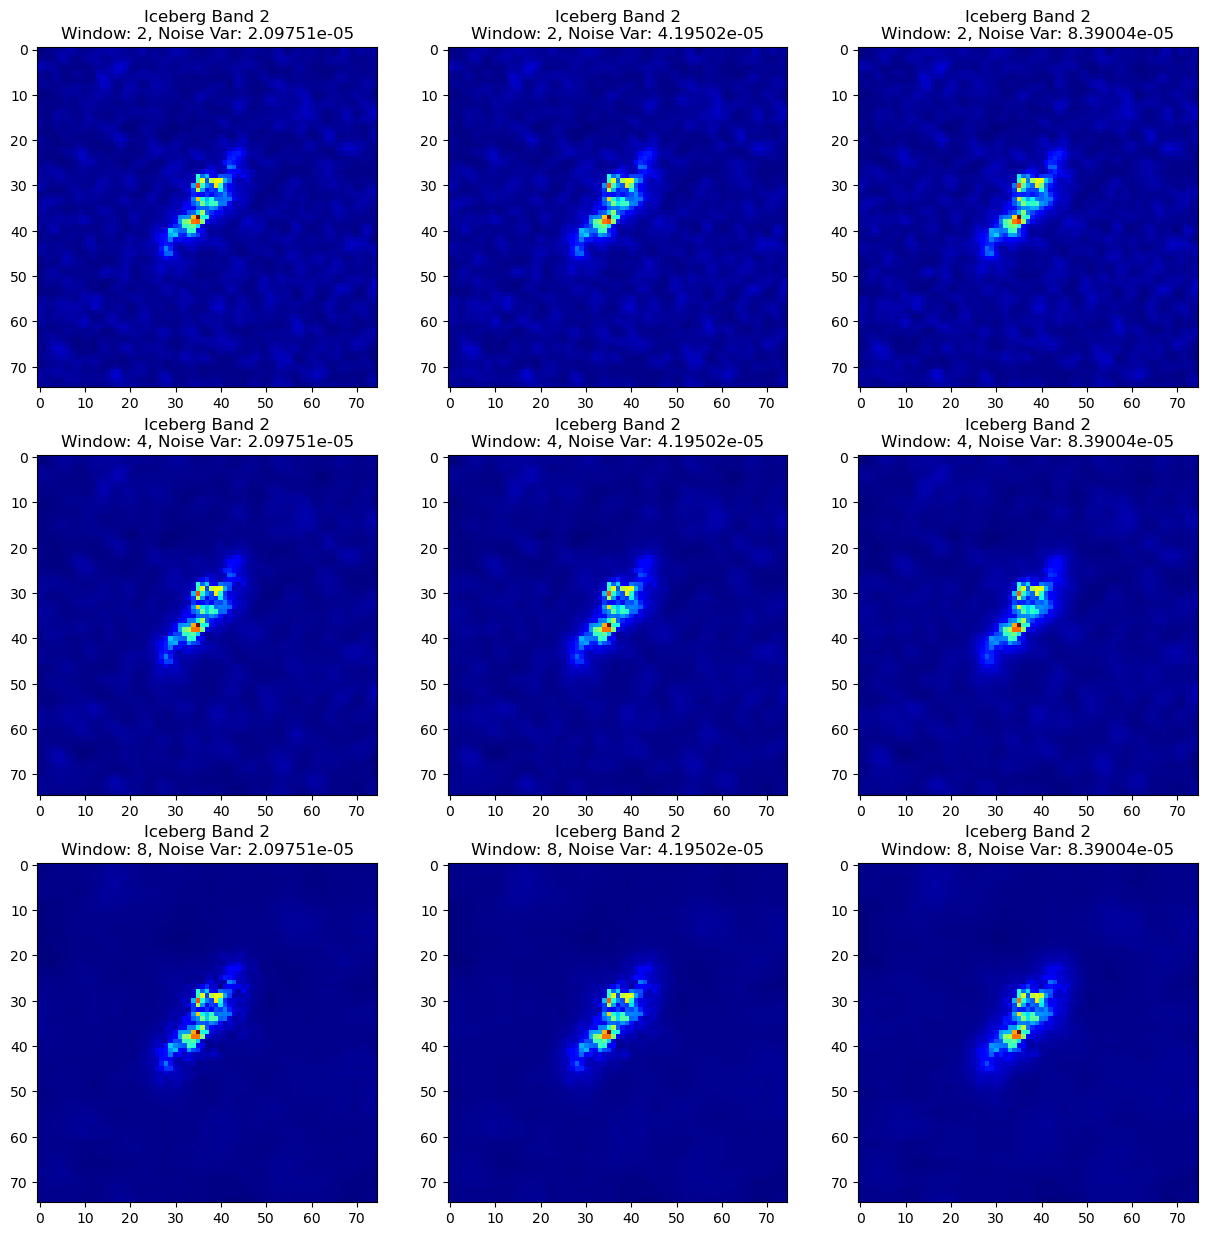

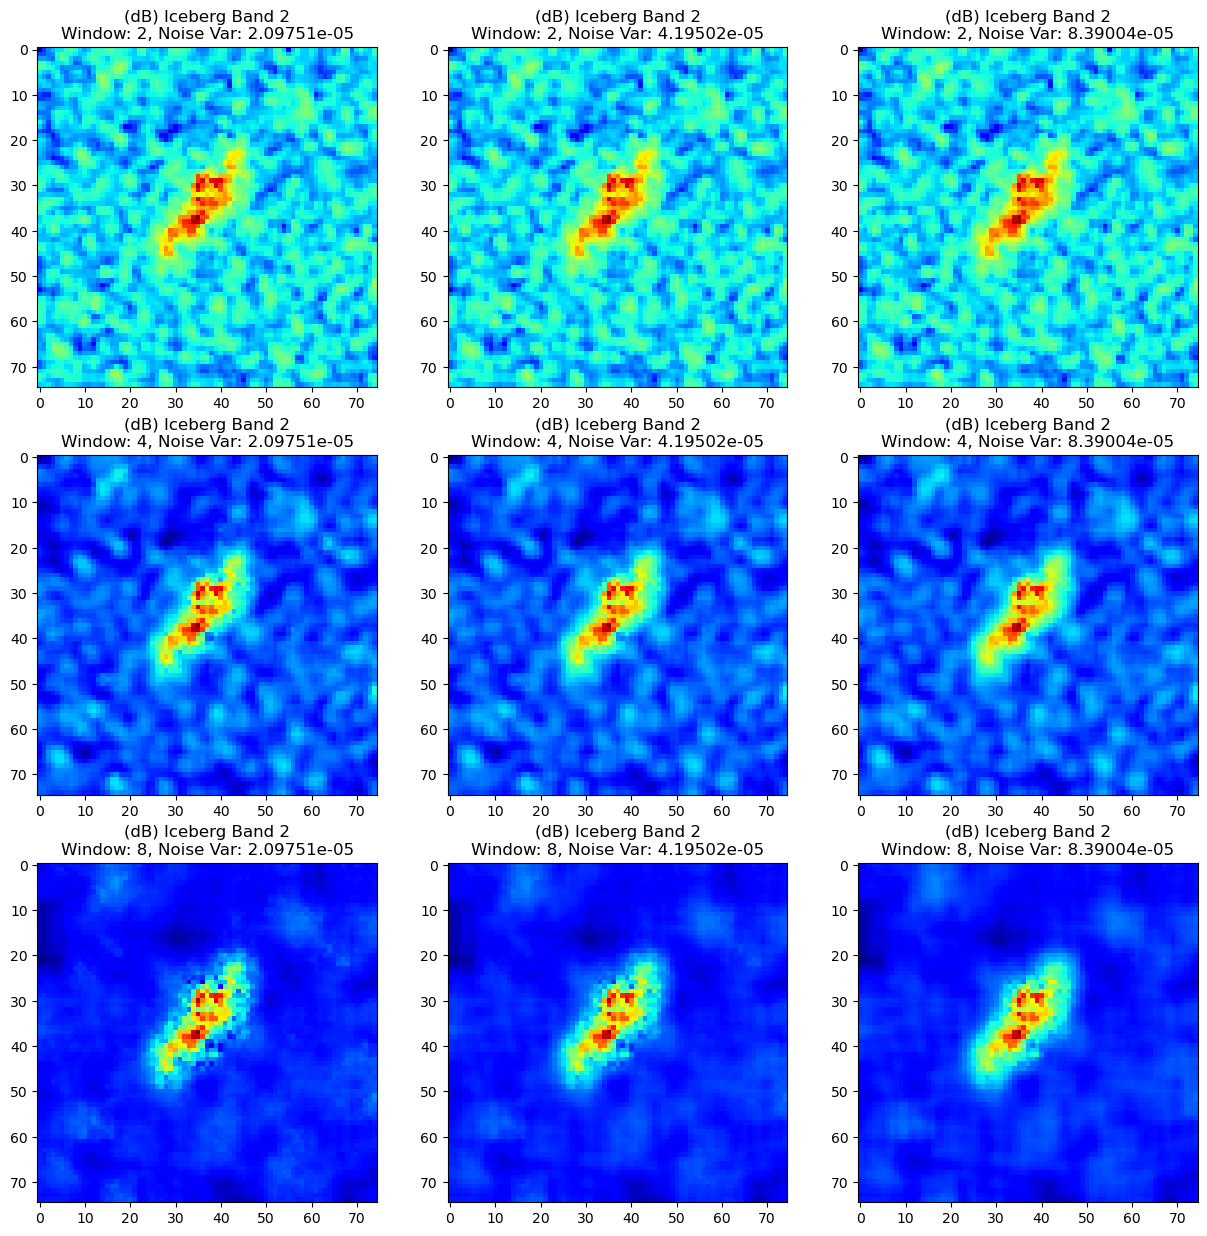

In [11]:
fig = plt.figure(4,figsize=(15,15))
p = 0
for i in range(3):
    for j in range(3):
        p+=1
        ax = fig.add_subplot(3,3,p)
        title = title_str_2.format(str(windows[i]), str(noise_var_2[j]))
        ax.set_title(title)
        ax.imshow(lee_filter(band_2_linear, windows[i], noise_var_2[j]),cmap='jet')    
plt.show()

fig = plt.figure(4,figsize=(15,15))
p = 0
for i in range(3):
    for j in range(3):
        p+=1
        ax = fig.add_subplot(3,3,p)
        title = title_str_2.format(str(windows[i]), str(noise_var_2[j]))
        ax.set_title('(dB) ' + title)
        ax.imshow(linear_to_decibel(lee_filter(band_2_linear, windows[i], noise_var_2[j])),cmap='jet')    
plt.show()